# In Class Assignment 1

## Monday, Jan. 29, 2018

Today's class focuses on Support Vector Machines (SVMs), a method of doing maximum margin classification. 

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

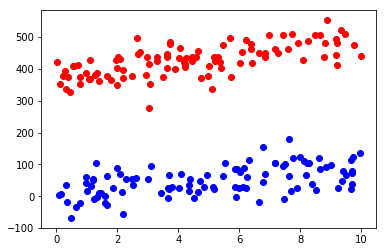

In [2]:
# Generate dummy data for linear SVM.

N = 100

np.random.seed(15)

x0 = 10*np.random.rand(N)
x1 = 10*np.random.rand(N)
b0 = 500*np.random.rand(1)*np.ones(N)
b1 = np.random.rand(1)*np.ones(N)

y0=10*x0+b0+np.random.normal(0,40,N)
y1=10*x1+b1+np.random.normal(0,40,N)

x=np.zeros((2*N,2))
y=np.zeros((2*N,))
y[:N]=1
y[N:]=-1

for i in range(N):
    x[i,:]=[x0[i],y0[i]]
    x[N+i,:]=[x1[i],y1[i]]

plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')

def plotClassifier(B,B0):
    
    x1=np.linspace(0,10,1000)
    x2=-1*(B[0]*x1+B0)/B[1]
    
    plt.plot(x1,x2,'k',linewidth=4)
    return

plt.show()

# Classification

Suppose we're given data points $x_i \in \mathbb{R}^n$ and $y_i \in \{-1,+1\}$, for $i = 1,\dots,N$. 

The $x_i$ are the features and $y_i$ are labels taking values in either $-1$ or $+1$. The $x_i$ could be the pixel intensities in an image of an animal, and $y_i$ could indicate whether the animal is a `cat` or `dog`, for example. For machine learning, we want to get a good guess of what $y_i$ is from only looking at $x_i$; so, the computer algorithm can take in images and distinguish between cats and dogs. 

## Defining a linear classifier
Our dataset is then $(x_1,y_1),\dots,(x_N,y_N)$.

Now let's fix some parameters $\beta \in \mathbb{R}^n$ and $\beta_0 \in \mathbb{R}$. We can define a hyperplane as:

$$\{ x : x^{T} \beta + \beta_0 = 0 \}$$

This cuts our feature space, $\mathbb{R}^n$, in half. That is, every point in $\mathbb{R}^n$ is either above, below, or on this hyperplane. 

Let:

$$
f(x;\beta,\beta_0) = x^T \beta + \beta_0
$$

Sometimes, when it is obvious, we'll drop the dependence on $\beta,\beta_0$ and just denote this $f(x)$.

We can define a classifier:

$$
G(x) = 
\begin{cases}
+1 & \text{ if } f(x) \geq 0 \\
-1 & \text{ if } f(x) < 0
\end{cases}
$$






## Task 1: Linear Classifier

We begin by creating a function that takes in $\beta$ and $\beta_0$ and outputs a label for each datapoint. Note that $X \in \mathbb{R}^{N \times 2}$ is a matrix of $N$ datapoints.

In [3]:

def classify(B,B0,X):
         
        Yhat=np.zeros(len(X))
        Yhat[np.dot(x,B)+B0>=0]=1
        Yhat[np.dot(x,B)+B0<0]=-1
        
        return Yhat
    



190 Data points were classified as +1
10 Data points were classified as -1




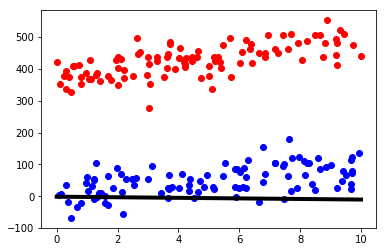

In [4]:
test_B=np.random.rand(2)
test_B0=np.random.rand(1)

print()
print()
print (str(np.sum(classify(test_B,test_B0,x)==1)) + ' Data points were classified as +1')
print (str(np.sum(classify(test_B,test_B0,x)==-1)) + ' Data points were classified as -1')
print()
print()


plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plotClassifier(test_B,test_B0)

plt.show()

# Maximum Margin Classification

Having defined a general function that classifies points, we now try to find the maximum margin classifier.

Suppose our dataset is strongly separable. (Sanity check: Is the data we are using separable by a hyperplane?). There are infinitely many hyperplanes that can separate this data. Which one of these separators is 'best'? The answer is the one with the largest margin.

Recall from class that the problem that maximum margin classification is trying to solve is:

\begin{align*}
\max_{\beta,\beta_0}~ & \frac{1}{\|\beta\|_2} \\
\text{subject to }~		& y_i (x_i^T \beta + \beta_0) \geq 1 \text{ for } i = 1,\dots,N \\
\end{align*}

Note that when we norm constraint, what was the `margin' before is now equal to $\frac{1}{\|\beta\|_2}$.


## Task 2: Maximum Margin Classifier in Closed Form

Using the KKT conditions derived in class, write out a closed form solution for $B$ and $B_0$

$$
B=???
$$

$$
B_0=???
$$

Now use this closed form, and implement it in code below:

In [ ]:
def maxMarginClassifier(X,Y):
    
    #TODO
    
    return B, B_0


In [ ]:
B,B_0=maxMarginClassifier(x,y)

print()
print()
print (str(np.sum(classify(B,B_0,x)==1)) + ' Data points were classified as +1')
print (str(np.sum(classify(B,B_0,x)==-1)) + ' Data points were classified as -1')
print ('The margin of the classifier is '+ str(1/np.linalg.norm(B,2)))
print()
print()


plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plotClassifier(B,B_0)

plt.show()

The data points that determine the maximum margin are commonly referred to as 'support vectors'. These are the points such that:

$$
||f(x)||=\frac{1}{\|\beta\|_2}
$$



Find the support vectors of the maximum margin classifier you derived previously:

In [ ]:
# Find the support vectors of the maximum margin classifier you found above. If there are K support vectors, return
# a Kx2 array with the support vectors

def supportVectors(X,Y,B,B0):
    
    #TODO
    
    return 
    

In [ ]:
svecs=supportVectors(x,y, B,B_0)

print()
print()
print( 'Support Vectors Shown in Green')
print()
print()


plt.figure()
plt.plot(x0,y0,'ro')
plt.plot(x1,y1,'bo')
plotClassifier(B,B_0)
plt.plot(svecs[:,0],svecs[:,1],'go')

plt.show()